# Match Analysis

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [44]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [45]:
matches.shape

(756, 14)

In [46]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only SRH VS RCB matches

In [47]:
SR = matches[np.logical_or(np.logical_and(matches['team1']=='Sunrisers Hyderabad',matches['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(matches['team2']=='Sunrisers Hyderabad',matches['team1']=='Royal Challengers Bangalore'))]

In [48]:
SR.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal"
432,2013,Bangalore,2013-04-09,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Royal Challengers Bangalore,0,7,V Kohli,M Chinnaswamy Stadium
481,2014,Bangalore,2014-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium
503,2014,Hyderabad,2014-05-20,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal"


In [49]:
SR.shape

(14, 14)

In [50]:
SR.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

In [51]:
SR.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [52]:
SR.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,14.0,17.142857,32.308268,0.0,0.0,2.5,14.75,118.0
win_by_wickets,14.0,2.571429,3.251373,0.0,0.0,0.0,5.50,8.0


## HEAD TO HEAD

Text(0.5, 1.0, 'RCB VS SRH-head to head')

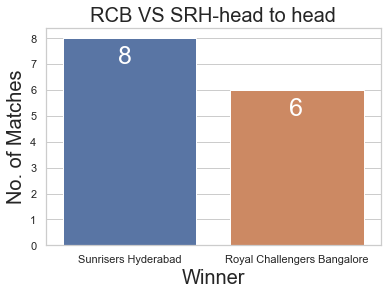

In [53]:
sns.countplot(SR["winner"])
plt.text(-0.07,7,str(SR['winner'].value_counts()['Sunrisers Hyderabad']),size=25,color='white')
plt.text(0.95,5,str(SR['winner'].value_counts()['Royal Challengers Bangalore']),size=25,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('RCB VS SRH-head to head',fontsize = 20)

In [54]:
Season_wise_Match_Winner = pd.DataFrame(SR.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between RCB VS SRH :")
Season_wise_Match_Winner

Season wise winner of matches between RCB VS SRH :


winner count
season winner                                   
2013   Royal Challengers Bangalore             1
       Sunrisers Hyderabad                     1
2014   Royal Challengers Bangalore             1
       Sunrisers Hyderabad                     1
2015   Royal Challengers Bangalore             1
       Sunrisers Hyderabad                     1
2016   Royal Challengers Bangalore             1
       Sunrisers Hyderabad                     2
2017   Sunrisers Hyderabad                     1
2018   Royal Challengers Bangalore             1
       Sunrisers Hyderabad                     1
2019   Royal Challengers Bangalore             1
       Sunrisers Hyderabad                     1

## Winning Percentage

In [55]:
Winning_Percentage = SR['winner'].value_counts()/len(SR['winner'])

In [56]:
print("SRH winning percentage against RCB(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("RCB winning percentage against SRH(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

SRH winning percentage against RCB(overall) : 57%
RCB winning percentage against SRH(overall) : 43%


## Performance Analysis

In [57]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [58]:
performance("Sunrisers Hyderabad",SR)

Number of times given team win while defending : 5
Number of times given team win while chasing   : 2

Average runs by which a given team wins while defending  :  36.0
Average wickets by which a given team wins while chasing :  8.0


In [59]:
performance("Royal Challengers Bangalore",SR)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  30.0
Average wickets by which a given team wins while chasing :  5.0


## Toss Analysis

In [60]:
Toss_Decision = pd.DataFrame(SR.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner                 toss_decision               
Royal Challengers Bangalore bat                        2
                            field                      6
Sunrisers Hyderabad         bat                        3
                            field                      3

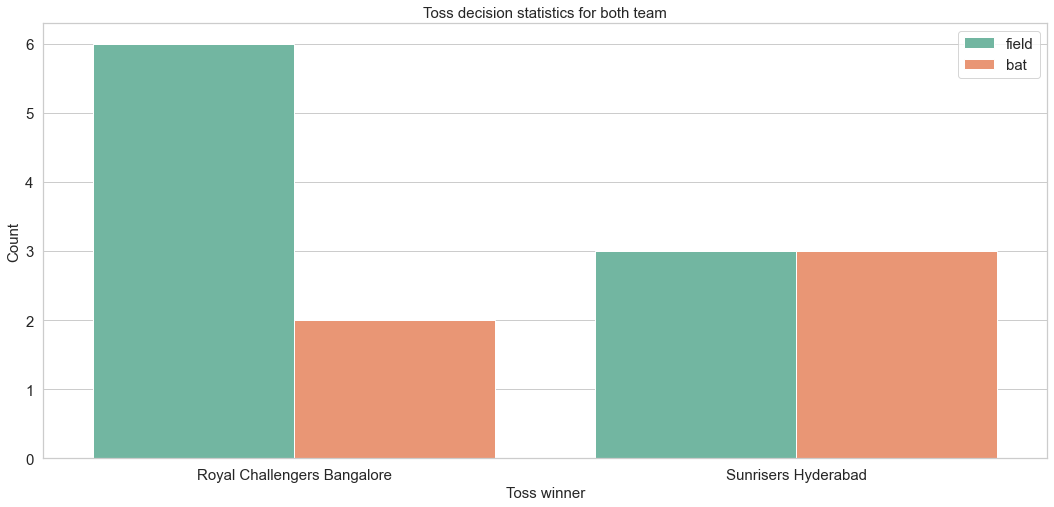

In [61]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(SR['toss_winner'],palette='Set2',hue=SR['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [62]:
Toss_Decision_based_Winner = pd.DataFrame(SR.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner                 toss_decision winner                             
Royal Challengers Bangalore bat           Sunrisers Hyderabad               2
                            field         Royal Challengers Bangalore       2
                                          Sunrisers Hyderabad               4
Sunrisers Hyderabad         bat           Royal Challengers Bangalore       2
                                          Sunrisers Hyderabad               1
                            field         Royal Challengers Bangalore       2
                                          Sunrisers Hyderabad               1

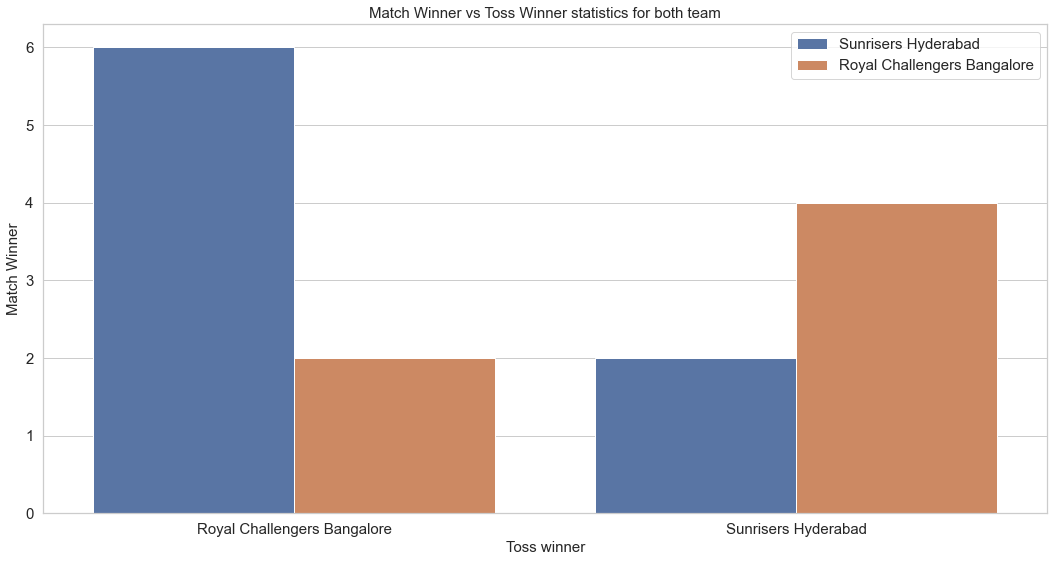

In [63]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SR['toss_winner'],hue=SR['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [64]:
RCB = SR[SR["toss_winner"]=="Royal Challengers Bangalore"]
SRH = SR[SR["toss_winner"]=="Sunrisers Hyderabad"]

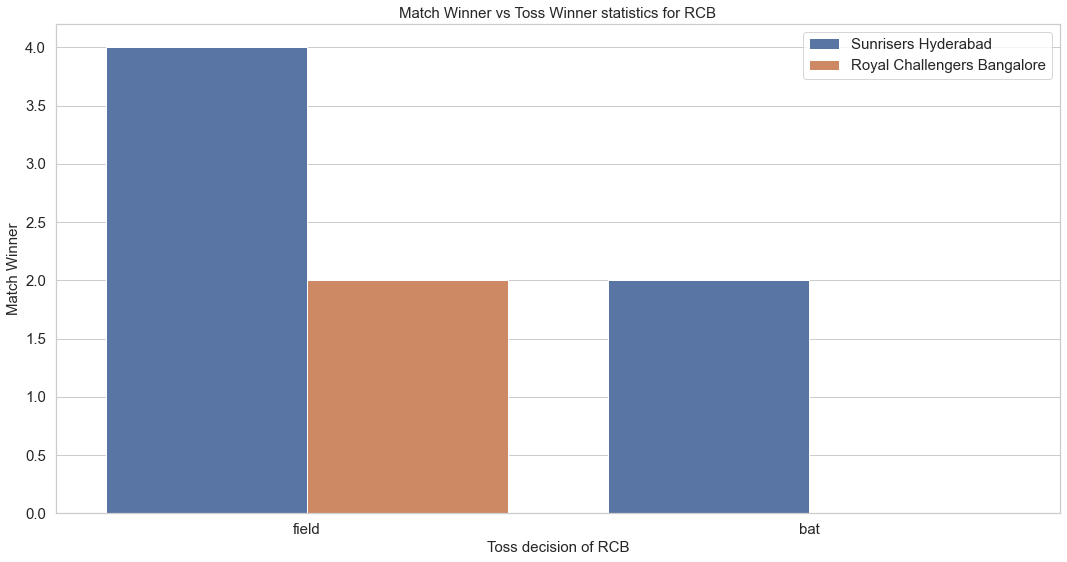

In [65]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RCB['toss_decision'],hue=RCB['winner'])
plt.title('Match Winner vs Toss Winner statistics for RCB',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RCB',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

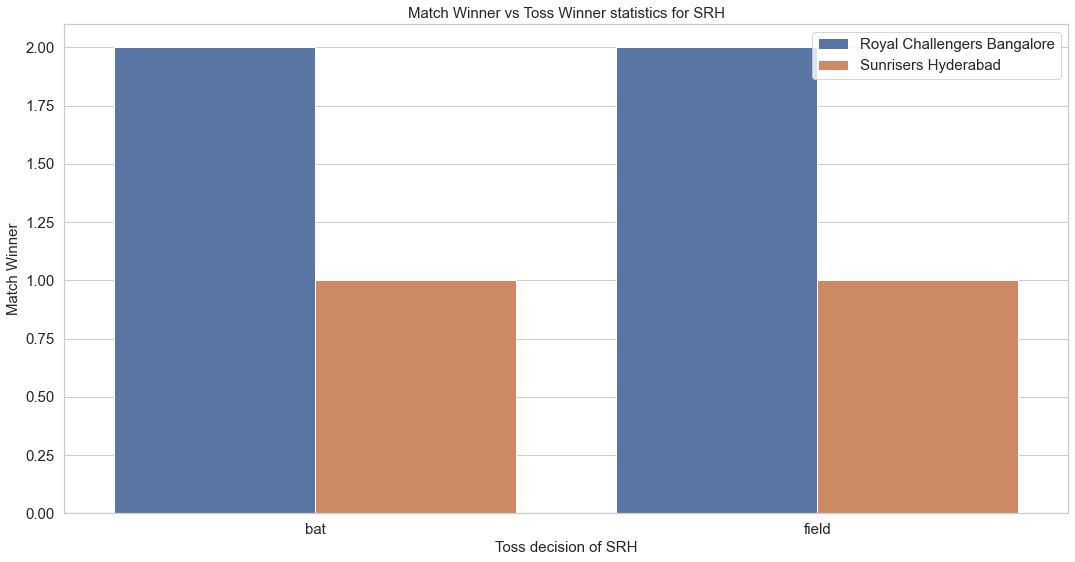

In [66]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SRH['toss_decision'],hue=SRH['winner'])
plt.title('Match Winner vs Toss Winner statistics for SRH',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of SRH',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [67]:
player_of_the_match = pd.DataFrame(SR.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
DA Warner,3
AB de Villiers,3
V Kohli,2
GH Vihari,1
J Bairstow,1
BCJ Cutting,1
S Hetmyer,1
KS Williamson,1
Yuvraj Singh,1


## Recent Year Performance Analysis

In [68]:
cond2 = SR["season"] == 2018
cond3 = SR["season"] == 2019
final = SR[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7932,2018,Hyderabad,07/05/18,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,5,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal"
7944,2018,Bengaluru,17/05/18,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,14,0,AB de Villiers,M Chinnaswamy Stadium
11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium
11345,2019,Bengaluru,04/05/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,S Hetmyer,M. Chinnaswamy Stadium


In [69]:
final.shape

(4, 14)

In [70]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
AB de Villiers,1
J Bairstow,1
S Hetmyer,1
KS Williamson,1


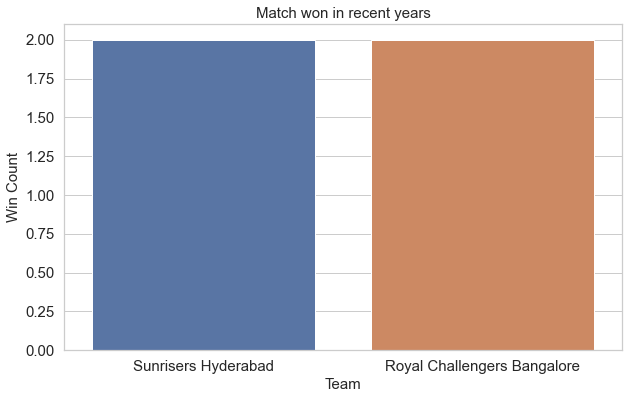

In [71]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to Head to Head, Toss analysis,reverse pattern ,Performance Analysis, Recent year analysis etc we saw that SRH has better chances of winning the match but also taking in consideration the reverse pattern between toss winner and match winner and good record of both teams while chasing, we can predict that the team chasing the score will have better chances of winning the match.